# Step 1: Installation and Setup

In [ ]:
# Installing TensorFlow
! pip install -q tensorflow-gpu

     |████████████████████████████████| 380.8MB 40kB/s 
     |████████████████████████████████| 450kB 40.2MB/s 
     |████████████████████████████████| 3.8MB 51.1MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.2 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goog

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.0.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [ ]:
# importing the dataset
from tensorflow.keras.datasets import mnist

In [ ]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [ ]:
x_train.min(), x_train.max()

(0, 255)

In [ ]:
y_train.min(), y_train.max()

(0, 9)

In [ ]:
# normalize the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train.min(), x_train.max()

(0.0, 1.0)

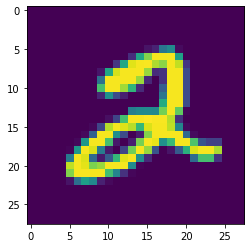

In [ ]:
plt.imshow(x_train[5])

In [ ]:
y_train[5]

2

# Step 3: Building the LSTM

In [ ]:
# define an object (initilizing RNN)
model = tf.keras.models.Sequential()

In [ ]:
# first LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='relu', return_sequences=True, input_shape=(28, 28)))
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# fully connected layer (first dense layer)
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 128)           80384     
_________________________________________________________________
dropout (Dropout)            (None, 28, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
# compile the model
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Training the model

In [ ]:
history =  model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 212s 4ms/sample - loss: 0.6280 - accuracy: 0.7944 - val_loss: 0.1667 - val_accuracy: 0.9500
Epoch 2/10
60000/60000 [==============================] - 211s 4ms/sample - loss: 0.1699 - accuracy: 0.9545 - val_loss: 0.1034 - val_accuracy: 0.9704
Epoch 3/10
60000/60000 [==============================] - 211s 4ms/sample - loss: 0.1150 - accuracy: 0.9695 - val_loss: 0.0629 - val_accuracy: 0.9823
Epoch 4/10
60000/60000 [==============================] - 210s 4ms/sample - loss: 0.0850 - accuracy: 0.9780 - val_loss: 0.0564 - val_accuracy: 0.9845
Epoch 5/10
60000/60000 [==============================] - 211s 4ms/sample - loss: 0.0937 - accuracy: 0.9781 - val_loss: 0.0554 - val_accuracy: 0.9840
Epoch 6/10
60000/60000 [==============================] - 211s 4ms/sample - loss: 0.0593 - accuracy: 0.9841 - val_loss: 0.0489 - val_accuracy: 0.9855
Epoch 7/10
60000/60000 [==========================

In [ ]:
# predictions
y_pred = model.predict_classes(x_test)

In [ ]:
print(y_pred[10]), print(y_test[10])

0
0


(None, None)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1130    2    0    0    0    2    0    1    0]
 [   1    0 1025    0    0    0    1    4    1    0]
 [   0    0    4 1001    0    2    0    1    2    0]
 [   0    4    0    0  952    0    4    1    3   18]
 [   0    1    0   11    0  875    2    1    2    0]
 [   4    2    0    0    0    0  951    0    1    0]
 [   0    9    9    2    0    0    0 1007    0    1]
 [   5    1    2    1    0    1    1    1  962    0]
 [   0    1    0    0    7    1    0    3    7  990]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9871


# Step 5: Learning Curve

In [ ]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

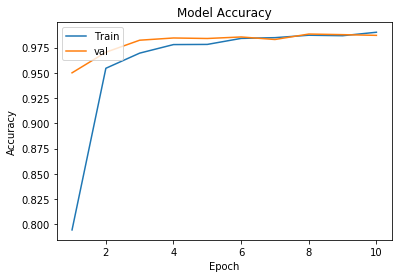

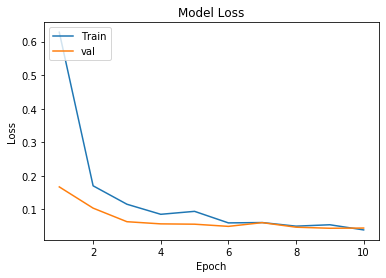

In [ ]:
learning_curve(history, 10)